<a href="https://colab.research.google.com/github/Pratikshavsanjekar/pothole-detection/blob/master/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

# New Section

In [0]:
import cv2
import numpy as np
#import pygame
import time
import smtplib
from matplotlib import pyplot as plt

In [0]:
# Show the image
# Open a new thread to manage the external cv2 interaction
cv2.startWindowThread()
def plt_show(image, title=""):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.title(title)
#     plt.imshow(image, cmap="Greys_r")
#     plt.imshow(image, cmap=plt.cm.Spectral)
    plt.imshow(image, cmap=plt.cm.Greys_r)
    plt.show()

In [0]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

In [0]:
r_image1 = cv2.imread('pp.jpg')
r_image2 = image_resize(r_image1, width = 275, height = 180)
plt.title("pedestrian Image")
plt.imshow(r_image2)
plt.show()



NameError: ignored

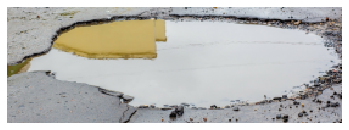

In [0]:
#resize_image = cv2.resize(r_image1, (275,180))
#plt_show(resize_image)

#im = cv2.imread('index4.jpg')
im = r_image2
plt_show(im)


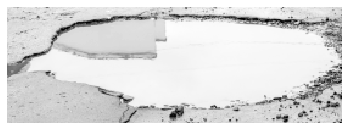

In [0]:
# Convert the GrayScale
gray1 = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt_show(gray1)


In [0]:
# save the image
cv2.imwrite('grayImg.jpg',gray1)

True

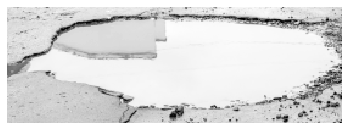

In [0]:
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
plt_show(imgray)

In [0]:
ret,thresh = cv2.threshold(imgray,127,255,0)

In [0]:
contours1, hierarchy1 = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

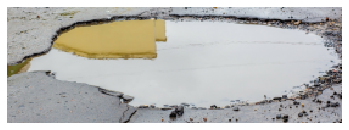

In [0]:
img2 = im.copy()
plt_show(img2)


In [0]:
contours2, hierarchy2 = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [0]:
out = cv2.drawContours(img2, contours2, -1, (0,250,0),1)

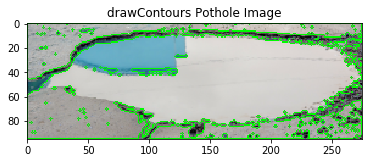

In [0]:
plt.title("drawContours Pothole Image")
plt.imshow(out)
plt.show()

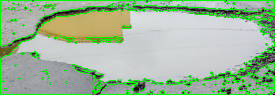

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

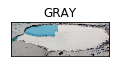

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(img2)
cv2.waitKey(0)
plt.subplot(331),plt.imshow(im),plt.title('GRAY')
plt.xticks([]), plt.yticks([])

In [0]:
img = cv2.imread('7.jpg',0)

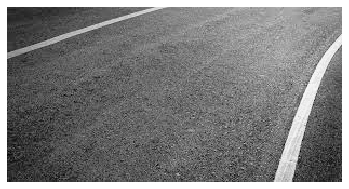

In [0]:
plt.imshow(out)
plt_show(img)
 


In [0]:
ret,thresh = cv2.threshold(img,127,255,0)

In [0]:
contours, hierarchy = cv2.findContours(thresh, 1, 2)

In [0]:
cnt = contours[0]
M = cv2.moments(cnt)
print(M)

{'m00': 2.0, 'm10': 516.0, 'm01': 318.0, 'm20': 133128.3333333333, 'm11': 82044.0, 'm02': 50562.33333333333, 'm30': 34347282.0, 'm21': 21167405.0, 'm12': 13045082.0, 'm03': 8039517.0, 'mu20': 0.3333333333139308, 'mu11': 0.0, 'mu02': 0.3333333333284827, 'mu30': 1.4901161193847656e-08, 'mu21': 3.0850060284137726e-09, 'mu12': 1.2514647096395493e-09, 'mu03': 1.862645149230957e-09, 'nu20': 0.0833333333284827, 'nu11': 0.0, 'nu02': 0.08333333333212067, 'nu30': 2.634178031930877e-09, 'nu21': 5.453571706731894e-10, 'nu12': 2.2122979565044475e-10, 'nu03': 3.2927225399135965e-10}


In [0]:
perimeter = cv2.arcLength(cnt,True)
print (perimeter)

5.656854152679443


In [0]:
area = cv2.contourArea(cnt)
print (area)

2.0


In [0]:
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
print (epsilon)
print (approx)

0.5656854152679444
[[[257 159]]

 [[258 158]]

 [[259 159]]

 [[258 160]]]


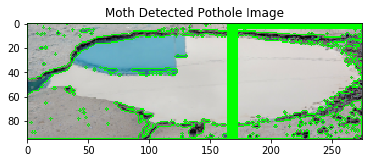

In [0]:
for c in contours:
    rect = cv2.boundingRect(c)
    if rect[2] < 100 or rect[3] < 100: continue
    #print cv2.contourArea(c)
    x,y,w,h = rect
    cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),8)
    cv2.putText(img2,'Moth Detected',(x+w+40,y+h),0,2.0,(0,255,0))
    
    plt.title("Moth Detected Pothole Image")
    from google.colab.patches import cv2_imshow
    plt.imshow(img2)
    plt.show()
    from google.colab.patches import cv2_imshow

In [0]:
k = cv2.isContourConvex(cnt)
print(k)


True


In [0]:
#blur
blur = cv2.blur(im,(5,5))

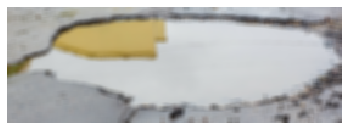

In [0]:
plt_show(blur)

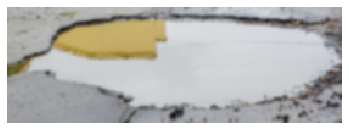

In [0]:
#guassian blur 
gblur = cv2.GaussianBlur(im,(5,5),0)
plt_show(gblur)

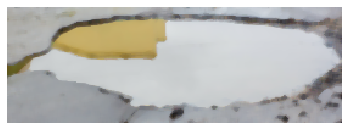

In [0]:
#median 
median = cv2.medianBlur(im,5)
plt_show(median)

In [0]:
#erosion
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(median,kernel,iterations = 1)

In [0]:
dilation = cv2.dilate(erosion,kernel,iterations = 5)

In [0]:
#erosion followed dilation
closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)


In [0]:
#canny edge detection
edges = cv2.Canny(dilation,9,220)

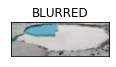

In [0]:
#plotting using matplotlib
plt.subplot(332),plt.imshow(blur),plt.title('BLURRED')
plt.xticks([]), plt.yticks([])
plt.show()

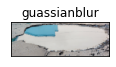

In [0]:
plt.subplot(333),plt.imshow(gblur),plt.title('guassianblur')
plt.xticks([]), plt.yticks([])  
plt.show()

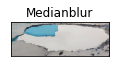

In [0]:
plt.subplot(334),plt.imshow(median),plt.title('Medianblur')
plt.xticks([]), plt.yticks([]) 
plt.show()

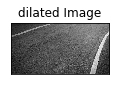

In [0]:
plt.subplot(337),plt.imshow(img,cmap = 'gray')
plt.title('dilated Image'), plt.xticks([]), plt.yticks([])
plt.show()

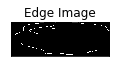

In [0]:
plt.subplot(338),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

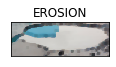

In [0]:
plt.subplot(335),plt.imshow(erosion),plt.title('EROSION')
plt.xticks([]), plt.yticks([])
plt.show()

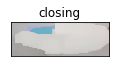

In [0]:
plt.subplot(336),plt.imshow(closing),plt.title('closing')
plt.xticks([]), plt.yticks([])
plt.show()

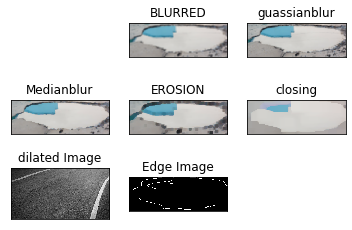

In [0]:
#plotting using matplotlib
plt.subplot(332),plt.imshow(blur),plt.title('BLURRED')
plt.xticks([]), plt.yticks([])
plt.subplot(333),plt.imshow(gblur),plt.title('guassianblur')
plt.xticks([]), plt.yticks([])        
plt.subplot(334),plt.imshow(median),plt.title('Medianblur')
plt.xticks([]), plt.yticks([]) 
plt.subplot(337),plt.imshow(img,cmap = 'gray')
plt.title('dilated Image'), plt.xticks([]), plt.yticks([])
plt.subplot(338),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(335),plt.imshow(erosion),plt.title('EROSION')
plt.xticks([]), plt.yticks([])
plt.subplot(336),plt.imshow(closing),plt.title('closing')
plt.xticks([]), plt.yticks([])
plt.show()

In [0]:
import os
!git clone https://github.com/ntasfi/PyGame-Learning-Environment.git
os.chdir('PyGame-Learning-Environment')
!pip install -e .
!pip install pygame
os.chdir('/content')
from pygame import mixer
def say():
    mixer.init()
    mixer.music.load('Users\Viswas Computers\Desktop\colab')
    mixer.music.play()
    while mixer.music.get_busy():
        time.sleep(0.2)

fatal: destination path 'PyGame-Learning-Environment' already exists and is not an empty directory.
Obtaining file:///content/PyGame-Learning-Environment
  Found existing installation: ple 0.0.1
    Can't uninstall 'ple'. No files were found to uninstall.
  Running setup.py develop for ple
